# Customer Segmentation Analysis Report 
## Submitted by: Mariano Viola, PhD 

## Executive Summary
>The goal of this customer segmentation analysis report is to help the Company to get to know their customer base better so they can identify specific groups for product development or product upsell or to communicate a targeted marketing message. We used Python programming to build several models that identify and segment various cluster groups based on their demographic variables. While each cluster group has unique characteristics that differentiate them from one another, members of the same group are similar to one another. Each customer segmentation model is described in detail and their analytical results are visualized in various charts and graphs. 

### What is Customer Segmentation and why is it useful?

- Customer segmentation is the process of dividing a company’s customers into groups based on common characteristics so companies can market to each group effectively and appropriately. 
- In business-to-consumer marketing, companies often segment customers according to demographics that include: 
    - Age
    - Gender
    - Marital status
    - Location (urban, suburban, rural) 
    - Life stage (single, married, divorced, empty-nester, retired, etc.) 
    
### Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company: 

- Create and communicate targeted marketing messages that will resonate with specific groups of customers 
- Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment 
- Identify ways to improve products or new product or service opportunities 
- Establish better customer relationships 
- Test pricing options 
- Focus on the most profitable customers 
- Improve customer service 
- Upsell and cross-sell other products and services 

### How do we build Customer Segmentation Models? 

- We used Python programming to leverage big data analytics on the company's customer data set. 
- We employed the following Python programming algorithms to enable us to effectively segment customer data: 
    1. Hierarchical clustering: to cluster the customer data and identify the number of different groups;
    2. K-means segmentation: to segment the customer groups and analyze key characteristics of the group and its members;
    3. Principal Component Analysis (PCA): to reduce dimensionality in the data set and identify key common characteristics that explain the main variations in the data set. 

### What are the Key Findings and Insights of our Customer Segmentation Study? 
- We have identified 4 customer cluster groups that each exhibit their own characteristics: 
    1. Standard segment;
    2. Career-focus segment;
    3. Fewer Opportunities segment, and
    4. Well-off segment.

### Key Characteristics of each customer cluster segment: 

- The largest segment with 692 individuals is the **standard cluster segment**. It represents roughly around 35% of the total data set. Members belonging to this group are mostly married females with an average age of around 29 years. They're mostly high school graduates employed in skilled or official positions (e.g., office assistants) and have an average income of around 106,000. They mostly reside in small to mid-sized cities. **Individuals in the standard segment tend to put a high value on lifestyle. They are not particularly career conscious nor are they interested in their work or life experience.** 

- The second largest group in the data set is the **career focus cluster** group with 583 people or 29% of the whole data set. 
Most members are single males with an average age of 35.6 years with a high school education level; their average income is around 141,218 and they tend to be self-employed or in skilled to highly skilled jobs. They mostly reside in mid-sized to big cities. **Career focused individuals tend to put a high emphasis on their career goals and are not so interested in lifestyle or their life/work experiences.**  

- The 3rd largest group is the **fewer opportunities cluster** with 460 people making up about 23.0% of the total dataset. 
Group members are about 70% male, mostly single with an average age of around 35.3 years with a high school education level or below. The group average income is around 93,692 and individuals are mostly employed in low-skilled jobs or are unemployed. The average member tends to reside in small cities. **Individuals in this group put a high emphasis on their work and life experience and put a low emphasis on career goals and education and lifestyle values.** 

- The smallest segment is the **well-off cluster** group with about 265 members making up around 13% of the total data set. This group is divided equally between male and female, and members tend to be married, divorced or separated. They tend to be highly educated (University level) with a high average income of around 158,338. Most are employed in skilled to highly skilled jobs and they tend to reside in mid-sized to big cities. **Individuals in this group are career focused and put a high emphasis on education and lifestyle. However, they put low values on work and life experience.** 

## Directories

In [1]:
%cd "C:\Users\maria\OneDrive\Desktop\Customer_Segmentation_Analytics"

C:\Users\maria\OneDrive\Desktop\Customer_Segmentation_Analytics


## Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

import warnings
warnings.filterwarnings("ignore")

## Import Data 

In [3]:
# Load the data, contained in the segmentation data csv file
df_segmentation = pd.read_csv('segmentation_data.csv', index_col = 0)

## Explore the Data

### Data Legend - describes each variable or feature in our data set. 
- **ID** - shows the customer ID
- **Sex** - Customer gender
    - 0 male
    - 1 female
- **Marital Status**
    - 0 Single
    - 1 non-Single (divorced/separated/married/widowed)
- **Age** - customer age in years (current Yr. - DOB at time of data creation)
    - 18 - minimum value (lowest age observed in the dataset)
    - 76 - maximum value (highest age observed in the dataset)
- **Education** - customer's education level
    - 0 - other / unknown
    - 1 - High School
    - 2 - University
    - 3 - Graduate school
- **Income** - self reported annual income in US dollars
    - 35,832 - minimum value (lowest income observed in the dataset)
    - 309,364 - maximum value (highest income observed in the dataset)
- **Occupation** - customer's occupation
    - 0 - unemployed / unskilled
    - 1 - skilled employee / official
    - 2 - management / self-employed / highly qualified / officer
- **Settlement size** - the size of the city the customer lives in
    - 0 - small city
    - 1 - mid-sized city
    - 2 - big city

### Step 1: We perform a descriptive analysis of the data set by examining the data visually to gain some insight. 

In [4]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


### Step 2: We determine the statistical distribution of each variable based on their count, average (mean), standard deviation, minimum value, 25th, 50th and 75th percentile and their maximum value. Each feature in the dataset contains 2,000 data points as shown in the "count" row. 

In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Step 3: Determine whether features in the dataset are correlated to each other by computing the Correlation Estimate: 
- We compute the Pearson correlation coefficient for each feature in our data set. The correlation coefficient describes whether certain features are correlated (positively or negatively and the degree of their correlation - high or low) with other features in the dataset. 
- When two features are positively correlated, they tend to move in the same direction. So, if the numerical value of one feature increases or decreases, then the numerical value of the other feature has a tendency to change in the same way.
- By contrast, when two features are negatively (or 'inversely') correlated, they tend to move in the opposite direction. So, if the numerical value of one feature increases, then the numerical value of the other feature has a tendency to move in the opposite direction (i.e., to decrease). 

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


### Step 4: Plot the Correlation Heatmap: 
- We plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding. We use the "Red-Blue" (RdBu) color scheme with a range of 1.0 to -1.0. A dark blue 1.0 displays a perfectly positive 100% correlation between two features. A dark red -1.0 shows a perfectly negative 100% correlation between two features in the dataset.

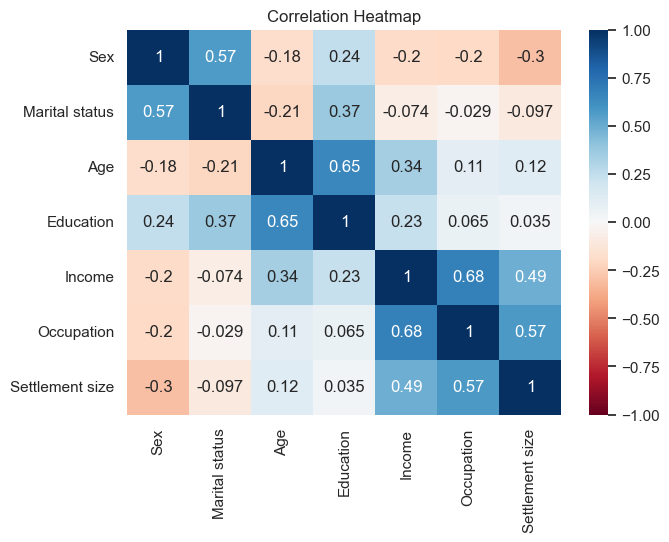

In [7]:
plt.figure(figsize = (7, 5))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 11)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 11)
plt.title('Correlation Heatmap')
plt.show()

### Results of our correlation heatmap shows: 
- a strong positive correlation between Age and Education (0.65). This could indicate that individuals who are older tend to have higher levels of education;
- a strong positive correlation between Income and Occupation (0.68). This may indicate that higher skilled individuals tend to generate higher levels of income;
- a strong positive correlation between Occupation and Settlement size (0.57). This may indicate that individuals in higher skilled occupations tend to reside in larger cities. 

### Step 5: Visualize the Raw Data 

Text(0.5, 1.0, 'Figure 1: Visualization of raw data')

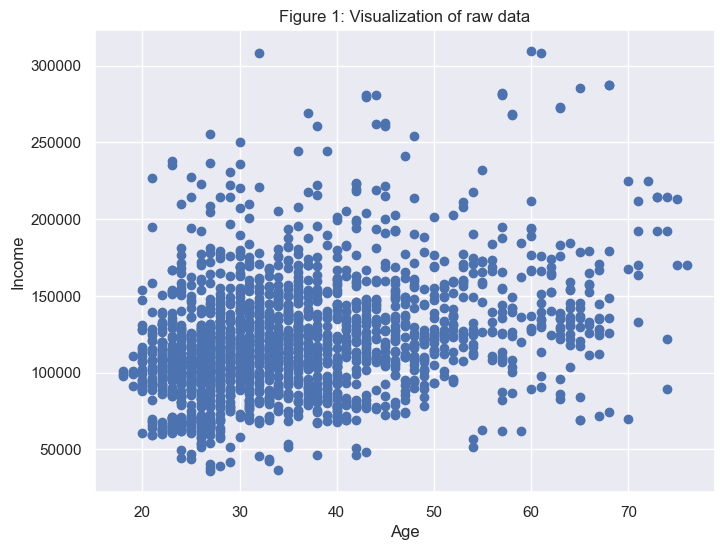

In [8]:
plt.figure(figsize = (8, 6))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Figure 1: Visualization of raw data')

### Figure 1: no pattern or trend can be observed in the data in Figure 1, just a lot of noise. 
- Figure 1 plots our data of 2,000 data points scattered across Age and Income. There is no observative pattern, just noise. 
- This is because the data has not yet been standardized. The Age data in years is not directly comparable to Income data which is in US dollar currency format. 
- The difference in the age range is 50 years while the difference in income range is 250,000. The model algorithm has only modeled the currency data and has completely ignored the age data since it is insignificant compared to the currency data. 
- To remove the bias in our data, all the data of the various features need to be standardized or scaled so that their values fall within the same numerical range and the differences between their values will be comparable to each other. 

## Data Standardization 
- We use Python's standard scaler which we import from the Sklearn module in order to pre-process and standardize our data. 

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Model No. 1: Hierarchical Clustering 
- We begin our customer segmentation analysis by applying our first segmentation algorithm to our dataset - the hierarchical clustering model. 
- The hierarchical clustering model groups similar objects in the dataset into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from one another, but the objects within each cluster are broadly similar to each other. 

In [10]:
hier_clust = linkage(segmentation_std, method = 'ward')

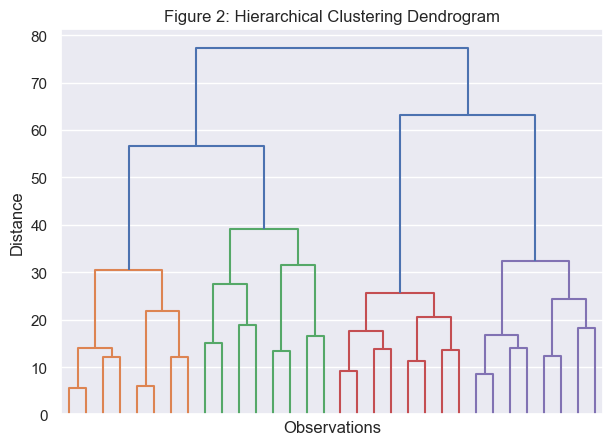

In [11]:
plt.figure(figsize = (7, 5))
plt.title('Figure 2: Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 4,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

### Figure 2: 
- Our hierarchical clustering dendrogram is comprised of 4 levels. The bottom level, level 4, shows our dataset as having around four different clusters or groups. Each group has features that are different from each other. 

## Model No. 2: K-means Clustering 
- The goal of K-means clustering is similar to hierarchical clustering - to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. 
- The K-means algorithm identifies *k* number of centroids within the dataset and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. 
- When applying K-means clustering, we assume our dataset has 1 to 10 clusters and we perform 10 iterations.
- We run the algorithm at many different starting points - *k means plus plus*. 
- We also establish a random state for reproducibility. 

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

### Figure 3: The WCSS curve of K-means Clustering 
- We plot the *Within Cluster Sum of Squares (WCSS)* curve for the ten different number of clusters in our dataset. 
- We look for an *elbow* or a *kink* in the curve which identifies how many groups or clusters there are in the dataset. 

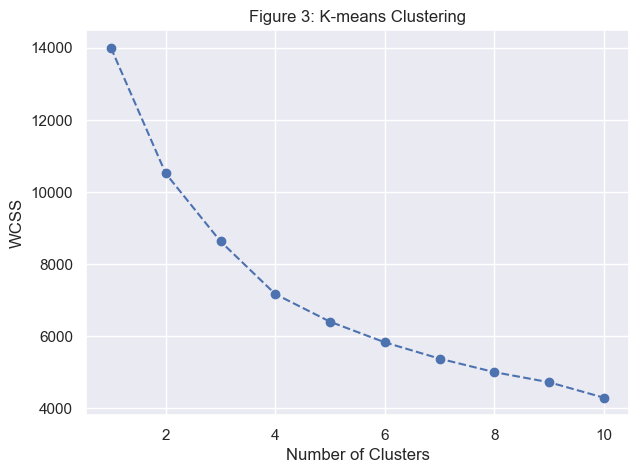

In [13]:
plt.figure(figsize = (7, 5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Figure 3: K-means Clustering')
plt.show()

### Figure 3: 
- We have identified that the elbow in the WCSS curve occurs when the number of clusters in our dataset is equal to 4. 
- We now run the K-means model where the number of clusters is equal to 4. 

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

### We now segment the dataset into four clusters and then fit our K-means model into the dataset. 

In [15]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Analyzing the new Dataset with 4 Different Customer Segments 

### We create a new data frame with the original features and add a new column with the assigned clusters for each point. 
- We also calculate mean values for each of the 4 clusters. 
- We now need to label each group and analyze each customer segment thoroughly. 

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [17]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


## Distinguishing features of the 4 K-means cluster segments: (see Data Legend for feature descriptions) 
**Segment 0**: 
- Group is roughly equal between male and female (0.50), mostly married/divorced/separated (0.69), tend to be highly educated (University level), high average income - 158,338; tend to be employed in skilled to highly skilled jobs and they tend to reside in mid-sized to big cities. 

**Segment 1**:
- Group is about 1/3 male (0.35), mostly single, average age of around 35.6 years, average education is high school or below, members have an average income of 97,859; most are employed in low-skilled jobs or unemployed and tend to reside in small cities.

**Segment 2**:
- Most members are female (0.85) and tend to be married (1.0), the average age is around 29 years, the average education is a high school education level with an average income of around 105,759; most are employed in skilled or official positions and they tend to reside in small to mid-sized cities.

**Segment 3**:
- Most members are male (0.03) and tend to be single; the average age is 35.6 years and they tend to have a high school education level; the average income is 141,218; the average job tends to be skilled/self-employed/highly skilled and they tend to reside in mid-sized to big cities. 

In [18]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

### We compute the size and proportions of the four clusters: 

In [19]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


### Segment Results: 
- **Segment 0**: has 263 observations comprising about 13.2% of the total dataset.
- **Segment 1**: has 462 observations making up about 23.1% of the total dataset.
- **Segment 2**: has 705 observations for around 35.2% of the total dataset.
- **Segment 3**: has about 570 observations for about 28.5% of the total dataset. 

### We now assign a descriptive label to each segment cluster based on their distinguishing characteristics: 
- **Segment 0** - **Well-off** 
- **Segment 1** - **Fewer Opportunities** 
- **Segment 2** - **Standard** 
- **Segment 3** - **Career-Focused** 

In [20]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


### We add the segment labels to our table 

In [21]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

### We plot the results from the K-means algorithm. 
- Each point in the data set has been plotted with the color of the clusters that it was assigned to. 

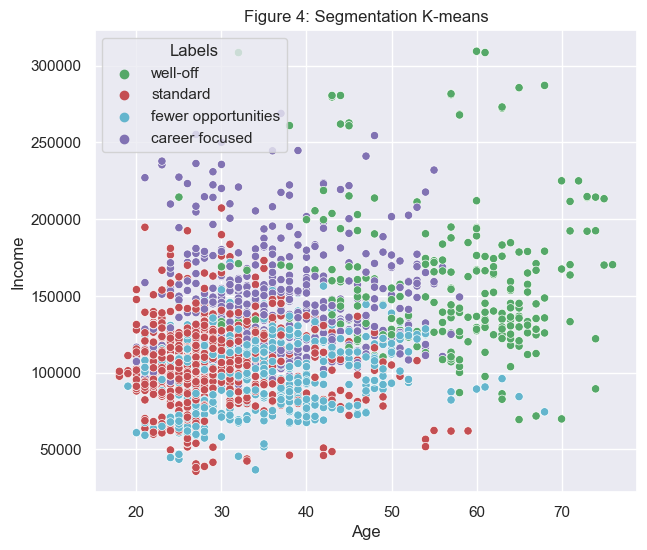

In [22]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (7, 6))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Figure 4: Segmentation K-means')
plt.show()

## Figure 4: K-means did a good job but we can get even better results by combining K-means with another classification algorithm - Principal Component Analysis (PCA) 
- Based on the K-means cluster graph, we can say that the K-means algorithm did a satisfactory job in separating the 2,000 points in the data set into 4 clusters. 
- We observe the green segment “well-off” is clearly separated as it is highest in both age and income. 
- However, the other three clusters are grouped together, so it's difficult to get more insight on the other 3 clusters by just looking at the graph. 
- To separate the other 3 clusters, we will combine K-means with principal component analysis to try to get a better result. 

## Model No. 3: Principal Component Analysis - PCA 
### What is Principal Component Analysis (PCA)? 

>Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” (or principal components) that can be more easily visualized and analyzed. 
>
>This methodology is also known as “dimensionality reduction” where large numbers of features can be reduced into a handful of variables that can explain the bulk of the variance (or the movements) of the data points in a large dataset. 

### Dimensionality Reduction 

>One of the reasons why it’s difficult to observe a pattern in Figure 4 is because the data points are clustered so close to each other – making it hard to see the clear lines of differentiation between each cluster. 
>
>This is because there are seven features (sex, age, marital status, education, etc.) that are plotted in a 2-dimensional (2D: x axis, y axis) graph. Ideally, to show each cluster segmentation clearly, all the data points need to be plotted in a 7-dimensional graph (7D), which is not possible. 
>
>By employing dimensionality reduction (through linear algebra), we can reduce the number of features to around 3 to 4 essential features which can explain around 80% to 90% of the variability in the data set. This makes it easier to see how each cluster segment is different from each other. 

## Applying PCA to the dataset 

In [23]:
pca = PCA()

In [24]:
pca.fit(segmentation_std)

PCA()

### The variance ratio shows how much variance is explained by each of the seven individual components. 

In [25]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

## What is the Explanatory Power of each Principal Component? 
- Component 1: explains about 35.7% of the variation in the data set.
- Component 2: explains around 26.3% of the movement in the data set.
- Component 3: explains about 18.8% of the variance in the data set.
- Component 4: explains around 8% of the variation in the data set.
- **All told, the 4 components explain around 90% of the movement in the data set.** 

## Plot the cumulative variance explained by total number of components. 
### On the graph we choose the subset of components we want to keep. We select 3 components because it explains around 80% of the variance in the data set. 

Text(0, 0.5, 'Cumulative Explained Variance')

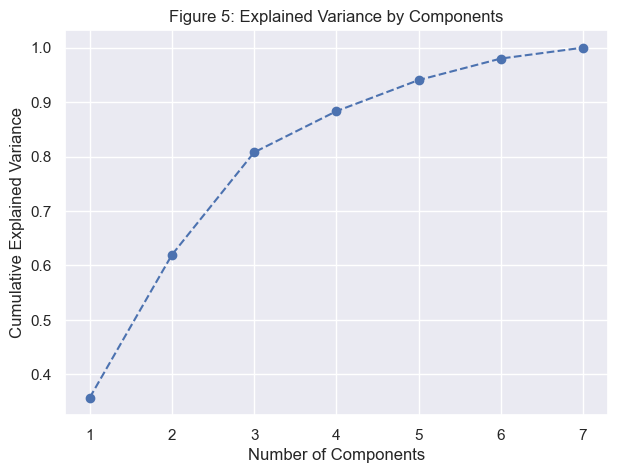

In [26]:
plt.figure(figsize = (7, 5))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Figure 5: Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### The PCA model with the 3 components is fitted to the data set. 

In [27]:
pca = PCA(n_components = 3)

In [28]:
pca.fit(segmentation_std)

PCA(n_components=3)

## PCA Results 

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

### Components 1 - 3 generate a set of correlations (aka "vector loadings") that show the degree of influence that each feature has on it. The closer the correlation approaches 1.0, the stronger its influence. 

In [30]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


## PCA Heat Map for the 3 components 

([<matplotlib.axis.YTick at 0x27bc8377510>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

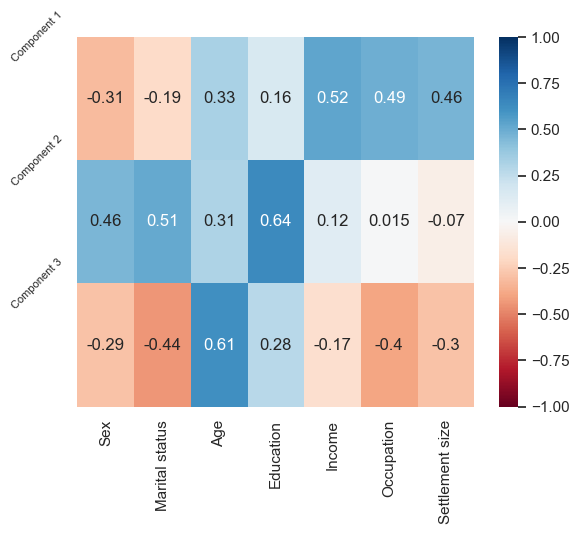

In [31]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 8)

### Component 1: Career-Focus
- There is a positive correlation between Component 1 and the features age, income, occupation, and settlement size. The features describe the career focus of the individual. We assign the label of "career-focus" to component 1.

### Component 2: Education and Lifestyle 
- The loadings of Component 2 seems to emphasize the individual's sex, marital status, and education which shows the person's education and lifestyle as the most prominent determinants. We therefore label component 2 as "Education and Lifestyle". 

### Component 3: Work and Life Experience 
- Component 3 shows age, marital status, and occupation as the most important determinants which relate to the person's work experience or life experience. We therefore assign the label of "Work and Life Experience" to Component 3. 

## PCA Scores: 
- We apply Components 1, 2 and 3 using the "PCA Transform" method to our previous segmented data set with 7 features reducing it to just 3 features ("dimensionality reduction"). 
- This generates a new data set of PCA scores for each of the 2,000 data points shown below. 

In [32]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

### Perform K-means clustering on the newly transformed 3D data set "scores_pca". 
- Save the new data set to the variable “scores PCA”. 
- Proceed to the next step of the analysis by performing K-means clustering again on our new data set of PCA scores.  

In [33]:
scores_pca = pca.transform(segmentation_std)

## Model No. 4: K-means clustering with PCA 
- We segment our newly transformed data set of PCA scores using the K-means algorithm and we apply clustering using principal components as our features. 
- We fit K-means using the transformed data from the PCA. 
- We plot the Within Cluster Sum of Squares (wcss) for the K-means PCA model. 

In [34]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

### Based on the "elbow" in the curve in Figure 6, we choose 4 cluster segments for our data set. 

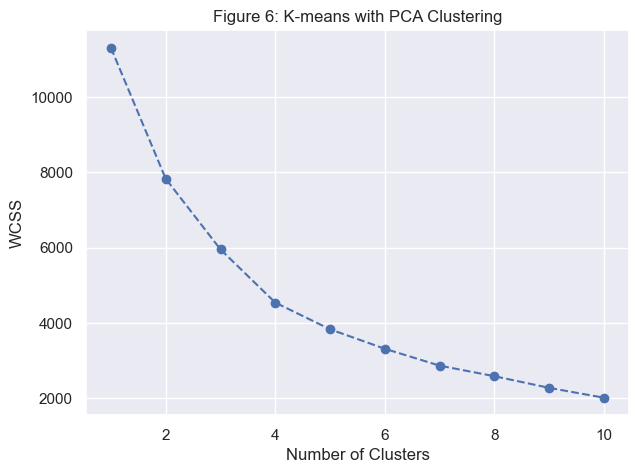

In [35]:
plt.figure(figsize = (7, 5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Figure 6: K-means with PCA Clustering')
plt.show()

### We run K-means with 4 cluster segments. 

In [36]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

### We fit our data with the K-means PCA model. 

In [37]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### K-means clustering with PCA Results 
- **The K-means algorithm has assigned each data point to one of the 4 cluster segments** based on the assigned PCA scores from Components 1, 2 and 3 that the individual has. 

In [38]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [39]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


### Calculate the means of each cluster segment group 

In [40]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


### Calculate the size of each cluster and its proportion to the entire data set and assign the same descriptive labels from the previous cluster segments. 
- **Component 1: Career-Focus**
- **Component 2: Education and Lifestyle**
- **Component 3: Work and Life Experience** 

In [41]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


## Model Results and Analysis: 

### Defining Group Characteristics: 
- **Standard** segment is low on both component 1 (career focus) and component 3 (work and life experience). However, it has high values on component 2 (education and lifestyle). 
- **Career focused** segment shows high values for component 1 (career) but low for component 2 (education and lifestyle) and component 3 (work and life experience). 
- **Fewer Opportunities** is low on both component 1 (career focus) and component 2 (education and lifestyle) but high on component 3 (work and life experience). 
- **Well-off** has the highest values on both component 1 (career focus) and component 2 (education and lifestyle) but low on component 3 (work and life experience). 

### Key Findings and Insights of our Customer Segmentation Study: 
- The largest segment with 692 individuals is the **standard segment**. It represents roughly around 35% of the total data set. Members belonging to this group are mostly married females with an average age of around 29 years. They're mostly high school graduates employed in skilled or official positions (e.g., office assistants) and have an average income of around 106,000. They mostly reside in small to mid-sized cities. **Individuals in this group tend to put a high value on lifestyle. They are not particularly career conscious nor are they interested in their work or life experience.** 

- The second largest group in the data set is the **career focus cluster** group with 583 people or 29% of the whole data set. 
Most members are single males with an average age of 35.6 years with a high school education level; their average income is around 141,218 and they tend to be self-employed or in skilled to highly skilled jobs. They mostly reside in mid-sized to big cities. **Career focused individuals tend to put a high emphasis on their career goals and are not so interested in lifestyle or their life/work experiences.** 

- The 3rd largest group is the **fewer opportunities cluster** with 460 people making up about 23.0% of the total dataset. 
Group members are about 70% male, mostly single with an average age of around 35.3 years with a high school education level or below. The group average income is around 93,692 and individuals are mostly employed in low-skilled jobs or are unemployed. The average member tends to reside in small cities. **Individuals in this group put a high emphasis on their work and life experience and put a low emphasis on career goals and education and lifestyle values.** 

- The smallest segment is the **well-off cluster** group with about 265 members making up around 13% of the total data set. This group is divided equally between male and female, and members tend to be married, divorced or separated. They tend to be highly educated (University level) with a high average income of around 158,338. Most are employed in skilled to highly skilled jobs and they tend to reside in mid-sized to big cities. **Individuals in this group are career focused and put a high emphasis on education and lifestyle. However, they put low values on work and life experience.** 

In [42]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

## Cluster Segment Visualization on a 2D plane. 

### The point of PCA was to determine the most important components so we can be certain that the first two components explain more variance than the third one. 

### Plot data by PCA components. Component 1 (Career-Focus: 36% explanatory power) is on the y-axis, Component 2 (Education / Lifestyle: 26% explanatory power) is on the x-axis. Total variation explained: 62% 

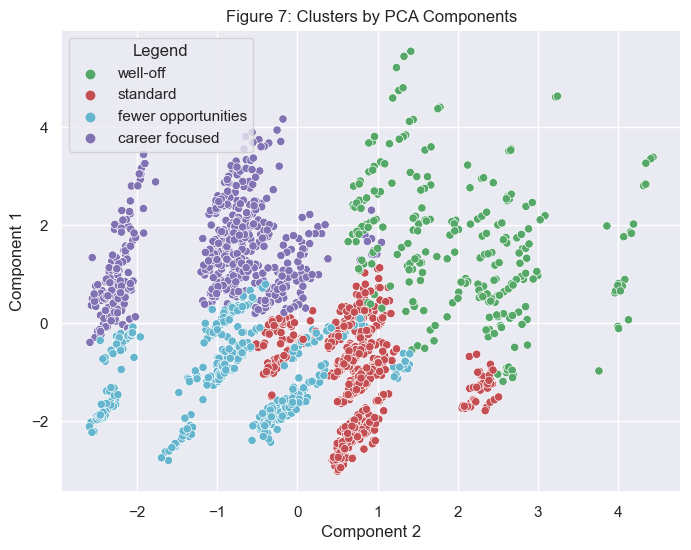

In [43]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Figure 7: Clusters by PCA Components')
plt.show()

## Figure 7 analysis: 

### - The well-off group is both high on career and education and lifestyle values. The group is clustered mostly on the upper right quadrant of the graph. 

### - In the opposite quadrant on the lower left of the graph is the fewer opportunities group which puts low values on both components. 

### - The standard group is mostly in the middle of the graph, which shows average values and indicates that this group is modestly interested in career goals and educational / lifestyle interests. Interesting to note is the overlap between the standard and fewer opportunities group. 

### - Lastly, the career focus group shows a strong interest in career goals and not so much interest in educational and lifestyle experiences. 

### Plot data by PCA components. The y-axis is Component 1 (Career-Focus: 36% explanatory power), the x-axis is Component 3 (Work and Life experience: 19% explanatory power). Total variation explained: 55% 

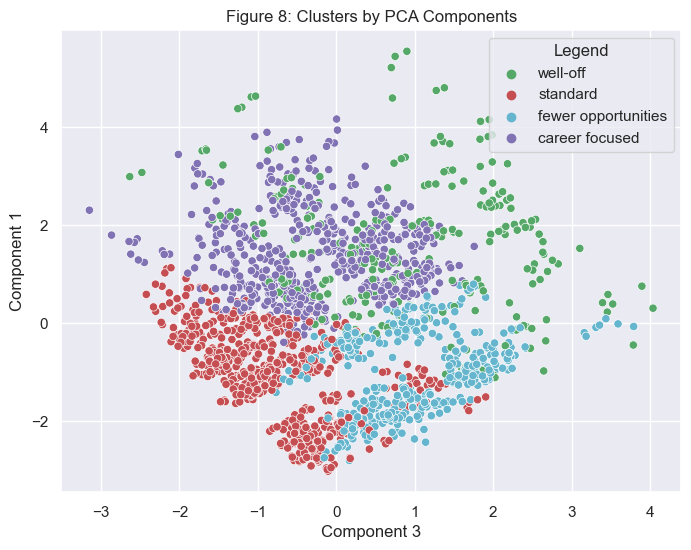

In [44]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_axis_1, y = y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Figure 8: Clusters by PCA Components')
plt.show()

### Plot data by PCA components. The y-axis is Component 2 (Education and Lifestyle: 26% explanatory power), x-axis is Component 3 (Work and Life experience: 19% explanatory power). Total variation explained: 45%. 

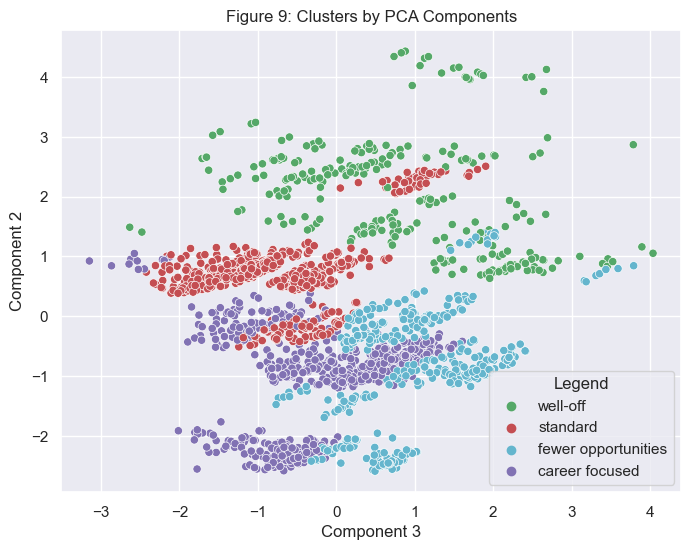

In [45]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_axis_1, y = y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Figure 9: Clusters by PCA Components')
plt.show()